# Задание 5. Разностный метод решения краевой задачи для обыкновенного дифференциального уравнения второго порядка. Мето прогонки

In [29]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_bvp as solve
from typing import Callable, List, Tuple, Any, Dict

# Параметры подобраны так, чтобы в МОЕМ!!! VSCode смотрелось хорошо.
plt.rcParams.update(
    {
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "lightgray",
        "axes.facecolor": "#151515",
        "axes.edgecolor": "#A2A2A2",
        "axes.labelcolor": "white",
        "axes.prop_cycle": plt.cycler('color', ['#00BBF9', '#FEE440', '#00F5D4', '#F15BB5', '#9B5DE5', '#1f77b4', '#ff7f0e', '#2ca02c',
            '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "#A2A2A2",
        "figure.facecolor": "#151515",
        "figure.edgecolor": "#A2A2A2",
        "savefig.facecolor": "#FFFFFF",
        "savefig.edgecolor": "black"
    }
)

### Вариант 12:

$$-\frac{7+x}{8-3x}u'' + \left(1-\frac{x}{3}\right)u' + \frac{1}{3}\ln(3+x)u = \frac{1+x}{2}$$

$$u'(-1)-3u(-1)=u'(1)=0$$

In [30]:
class Equation:
    def __init__(self,
                 P: Callable, Q: Callable, R: Callable, F: Callable,
                 a: float, b: float,
                 a1: float, a2: float, b1: float, b2: float
                 ):
        self.P, self.Q, self.R, self.F = P, Q, R, F
        self.a, self.b = a, b
        self.a1, self.a2, self.b1, self.b2 = a1, a2, b1, b2

    def show(self, n: int, *argv: Dict[str, Any]) -> None:
        def fun(x,y):
            return np.vstack([y[1], (self.Q(x) * y[1] + self.R(x) * y[0] - self.F(x)) / self.P(x)])  
        def bc(ya, yb):
            return np.array([ya[0], yb[0]]) 
        x = np.linspace(self.a, self.b, n+1)
        y = np.zeros((2, n+1))
        Expected = solve(fun, bc, x, y).sol(x)[0]
        
        fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
        ax.plot(x, Expected, label='Expected')
        for approx in argv:
            ax.plot(x, approx['sol'], label=approx['label'])
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.legend()
        ax.grid()
        plt.show()
        


In [31]:
P = lambda x: (7 + x) / (8 - 3 * x)
Q = lambda x: 1 - x / 3
R = lambda x: 1 / 3 * np.log(3 + x)
F = lambda x: (1 + x) / 2
a, b = -1, 1

diff_EQ = Equation(P, Q, R, F, a, b, 1, 3, 1, 0)

In [32]:
def first_order_approximation(n: int, eq: Equation = diff_EQ) -> Dict[str, np.ndarray]:
    h = (eq.b - eq.a) / n
    X = np.linspace(eq.a, eq.b, n+1)
    A, B, C, G, y, s, t = (np.zeros(n+1) for _ in range(7))
    B[0] = h
    s[0] = C[0] / B[0]
    t[0] = -G[0] / B[0]

    for i in range (1, n+1):
        if i < n:
            A[i] = -eq.P(X[i]) - eq.Q(X[i]) * h / 2
            C[i] = -eq.P(X[i]) + eq.Q(X[i]) * h / 2
            B[i] = A[i] + C[i] - h**2 * eq.R(X[i])
            G[i] = h**2 * eq.F(X[i])
        else:
            B[i] = h
        s[i] = C[i] / (B[i] - A[i] * s[i-1])
        t[i] = (A[i] * t[i-1] - G[i]) / (B[i] - A[i] * s[i-1])
        
    y[n] = t[n]
    for i in range(n-1,-1,-1):
        y[i] = s[i] * y[i+1] + t[i]
    
    return {'X': X, 'A': A, 'B': B, 'C': C, 'G': G, 's': s, 't': t, 'y': y}

first_order_approximation = first_order_approximation(10)
pd.DataFrame(first_order_approximation).transpose()

,0,1,2,3,4,5,6,7,8,9,10
X,-1.0,-0.800000,-0.600000,-0.400000,-0.200000,0.000000,0.200000,0.400000,0.600000,0.800000,1.0
A,0.0,-0.722821,-0.773061,-0.830725,-0.897364,-0.975000,-1.066306,-1.174902,-1.305806,-1.466190,0.0
B,0.2,-1.202820,-1.317795,-1.447523,-1.595124,-1.764648,-1.961455,-2.192788,-2.468692,-2.803514,0.2
C,0.0,-0.469487,-0.533061,-0.604058,-0.684031,-0.775000,-0.879640,-1.001569,-1.145806,-1.319524,0.0
G,0.0,0.004000,0.008000,0.012000,0.016000,0.020000,0.024000,0.028000,0.032000,0.036000,0.0
s,0.0,0.390322,0.524639,0.597077,0.645722,0.682778,0.713180,0.739235,0.762147,0.782607,0.0
t,-0.0,0.003326,0.010404,0.020404,0.032388,0.045441,0.058743,0.071606,0.083481,0.093946,0.0
y,0.0,0.029439,0.066903,0.107692,0.146191,0.176242,0.191571,0.186248,0.155081,0.093946,0.0


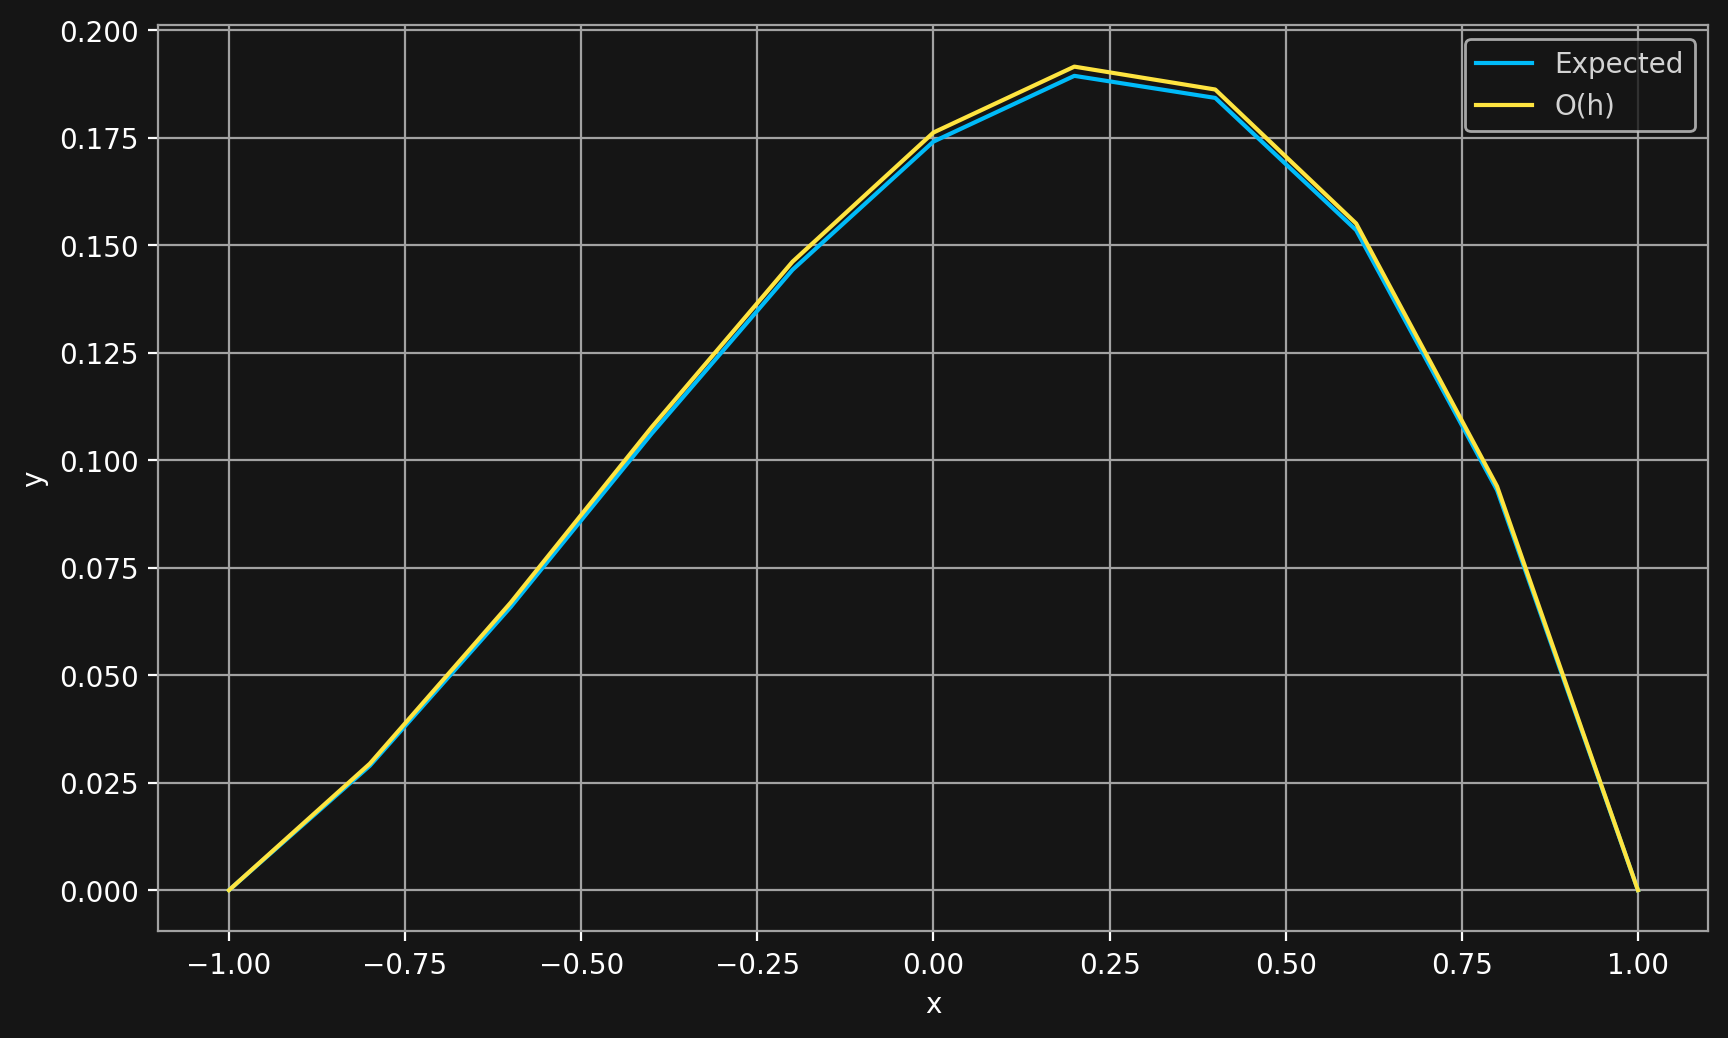

In [33]:
diff_EQ.show(10, {'sol': first_order_approximation['y'], 'label': 'O(h)'})